In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('Train_Orig_OH.csv')
Validation_data = pd.read_csv('Valid_Orig_OH.csv')
Test_data = pd.read_csv('Test_Orig_OH.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             12000 non-null  int64  
 1   AnnualIncome                    12000 non-null  int64  
 2   CreditScore                     12000 non-null  int64  
 3   Experience                      12000 non-null  int64  
 4   LoanAmount                      12000 non-null  int64  
 5   LoanDuration                    12000 non-null  int64  
 6   NumberOfDependents              12000 non-null  int64  
 7   MonthlyDebtPayments             12000 non-null  int64  
 8   CreditCardUtilizationRate       12000 non-null  float64
 9   NumberOfOpenCreditLines         12000 non-null  int64  
 10  NumberOfCreditInquiries         12000 non-null  int64  
 11  DebtToIncomeRatio               12000 non-null  float64
 12  BankruptcyHistory               

In [3]:
Train_data.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanApproved,RiskScore
0,57,47030,511,35,15823,24,2,404,0.363811,2,...,0,0,1,0,0,0,1,0,0,51.0
1,31,44704,587,6,42377,84,4,307,0.478811,2,...,0,0,0,0,1,0,0,0,0,50.0
2,40,86684,609,18,17768,36,4,513,0.159431,1,...,0,0,0,0,0,1,0,0,0,53.0
3,59,207724,666,36,19782,60,0,403,0.292295,2,...,0,0,0,1,0,0,0,0,1,33.6
4,32,54324,574,12,37298,48,1,541,0.187842,1,...,0,0,0,0,0,1,0,0,0,53.0


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.953750
1  0.874134
2  0.824392
3  0.784778
4  0.753927
Validation Data
Confusion Matrix for hidden layer 8
[[2992   52]
 [ 619  337]]
Accuracy: 0.8323, Precision: 0.8663, Recall: 0.3525, F1-score: 0.5011

Test Data
Confusion Matrix for hiden layer 8
[[2992   52]
 [ 601  355]]
Accuracy: 0.8367, Precision: 0.8722, Recall: 0.3713, F1-score: 0.5209



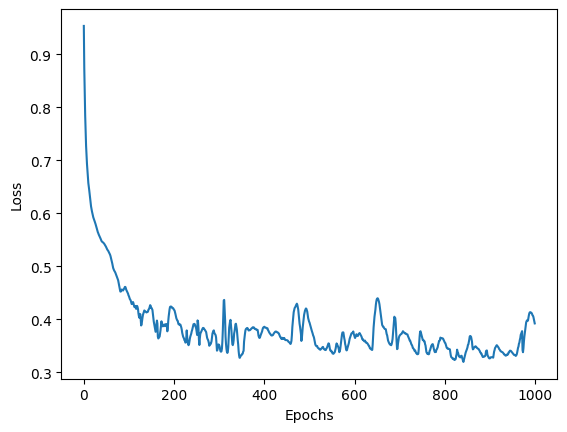

Training Losses are 
          0
0  0.567828
1  0.529524
2  0.520383
3  0.521325
4  0.517145
Validation Data
Confusion Matrix for hidden layer 16
[[3041    3]
 [ 854  102]]
Accuracy: 0.7857, Precision: 0.9714, Recall: 0.1067, F1-score: 0.1923

Test Data
Confusion Matrix for hiden layer 16
[[3043    1]
 [ 862   94]]
Accuracy: 0.7843, Precision: 0.9895, Recall: 0.0983, F1-score: 0.1789



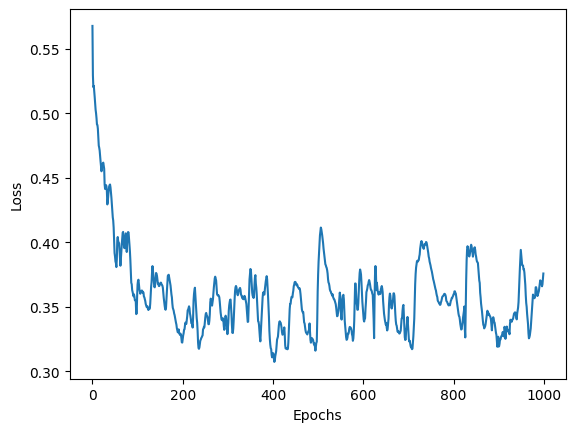

Training Losses are 
          0
0  0.587716
1  0.541812
2  0.520188
3  0.510913
4  0.507606
Validation Data
Confusion Matrix for hidden layer 32
[[2985   59]
 [ 573  383]]
Accuracy: 0.8420, Precision: 0.8665, Recall: 0.4006, F1-score: 0.5479

Test Data
Confusion Matrix for hiden layer 32
[[2985   59]
 [ 577  379]]
Accuracy: 0.8410, Precision: 0.8653, Recall: 0.3964, F1-score: 0.5438



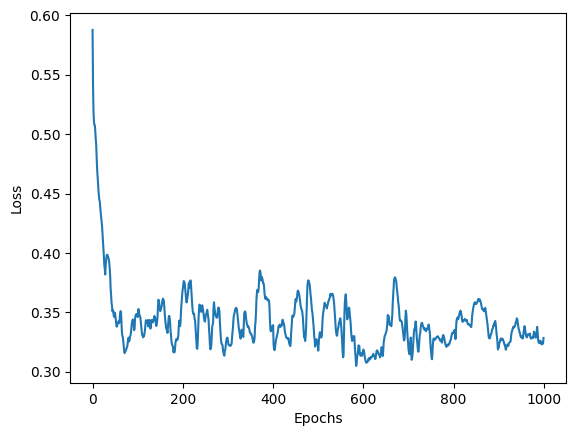

Training Losses are 
          0
0  0.859170
1  0.671416
2  0.566115
3  0.531014
4  0.529963
Validation Data
Confusion Matrix for hidden layer 64
[[2783  261]
 [ 362  594]]
Accuracy: 0.8442, Precision: 0.6947, Recall: 0.6213, F1-score: 0.6560

Test Data
Confusion Matrix for hiden layer 64
[[2767  277]
 [ 357  599]]
Accuracy: 0.8415, Precision: 0.6838, Recall: 0.6266, F1-score: 0.6539



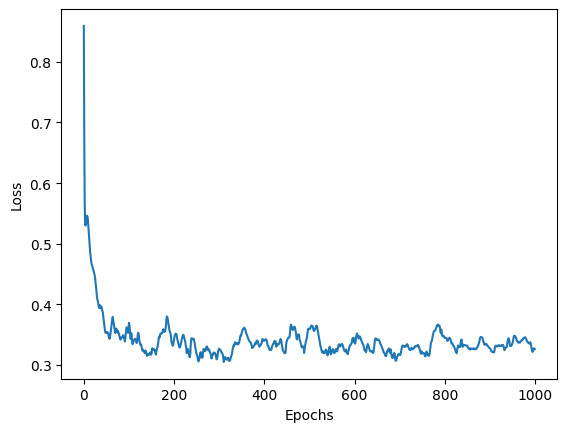

Training Losses are 
          0
0  0.564240
1  0.546477
2  0.512384
3  0.491787
4  0.485269
Validation Data
Confusion Matrix for hidden layer 128
[[2935  109]
 [ 483  473]]
Accuracy: 0.8520, Precision: 0.8127, Recall: 0.4948, F1-score: 0.6151

Test Data
Confusion Matrix for hiden layer 128
[[2939  105]
 [ 482  474]]
Accuracy: 0.8532, Precision: 0.8187, Recall: 0.4958, F1-score: 0.6176



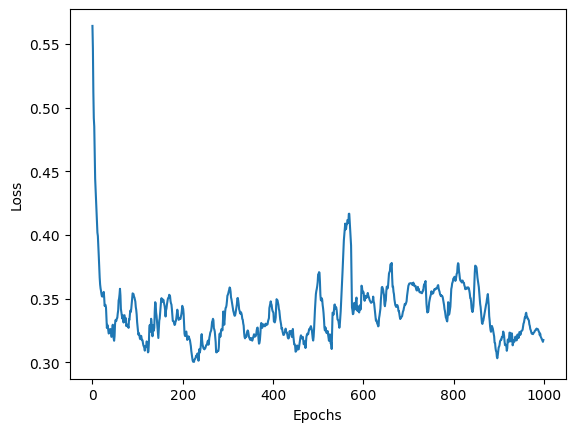

Best accuracy for test data is 0.85325 for degree 128


In [12]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(49,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

In [13]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.803037
1  0.800956
2  0.798879
3  0.796867
4  0.794840
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


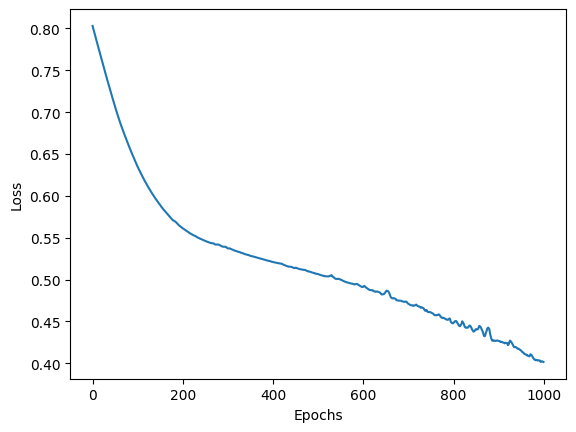

Training Losses are 
          0
0  0.980363
1  0.974326
2  0.968539
3  0.962723
4  0.956983
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2815  229]
 [ 286  670]]
Accuracy: 0.8712, Precision: 0.7453, Recall: 0.7008, F1-score: 0.7224

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2819  225]
 [ 298  658]]
Accuracy: 0.8692, Precision: 0.7452, Recall: 0.6883, F1-score: 0.7156



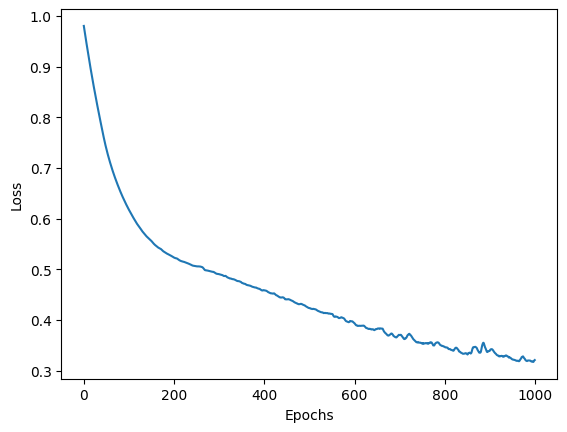

Training Losses are 
          0
0  0.791272
1  0.783585
2  0.776095
3  0.768796
4  0.761652
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2796  248]
 [ 333  623]]
Accuracy: 0.8548, Precision: 0.7153, Recall: 0.6517, F1-score: 0.6820

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2781  263]
 [ 325  631]]
Accuracy: 0.8530, Precision: 0.7058, Recall: 0.6600, F1-score: 0.6822



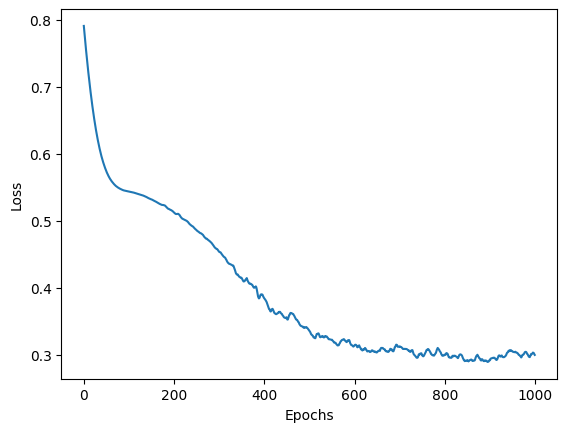

Training Losses are 
          0
0  0.721786
1  0.710462
2  0.699602
3  0.689176
4  0.679165
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2888  156]
 [ 398  558]]
Accuracy: 0.8615, Precision: 0.7815, Recall: 0.5837, F1-score: 0.6683

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2878  166]
 [ 397  559]]
Accuracy: 0.8592, Precision: 0.7710, Recall: 0.5847, F1-score: 0.6651



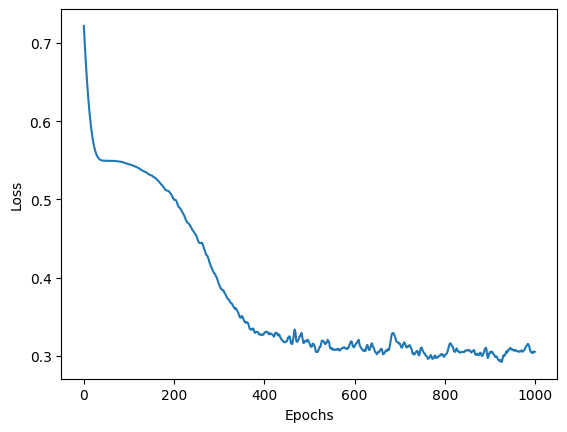

Training Losses are 
          0
0  0.954646
1  0.950796
2  0.947048
3  0.943460
4  0.939860
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[2704  340]
 [ 203  753]]
Accuracy: 0.8642, Precision: 0.6889, Recall: 0.7877, F1-score: 0.7350

Test Data
Confusion Matrix for hiden layer 16 and 8
[[2696  348]
 [ 194  762]]
Accuracy: 0.8645, Precision: 0.6865, Recall: 0.7971, F1-score: 0.7377



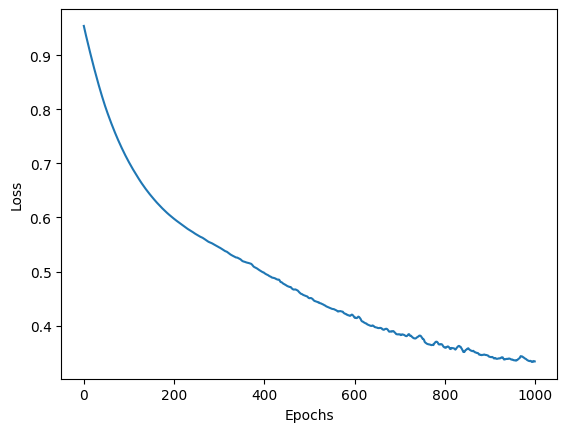

Training Losses are 
          0
0  0.877989
1  0.872333
2  0.866664
3  0.861062
4  0.855563
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2765  279]
 [ 270  686]]
Accuracy: 0.8628, Precision: 0.7109, Recall: 0.7176, F1-score: 0.7142

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2735  309]
 [ 266  690]]
Accuracy: 0.8562, Precision: 0.6907, Recall: 0.7218, F1-score: 0.7059



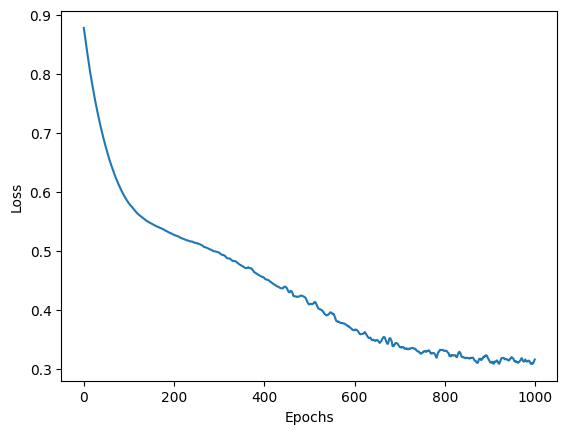

Training Losses are 
          0
0  0.822468
1  0.813763
2  0.805444
3  0.797150
4  0.788991
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2850  194]
 [ 340  616]]
Accuracy: 0.8665, Precision: 0.7605, Recall: 0.6444, F1-score: 0.6976

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2852  192]
 [ 329  627]]
Accuracy: 0.8698, Precision: 0.7656, Recall: 0.6559, F1-score: 0.7065



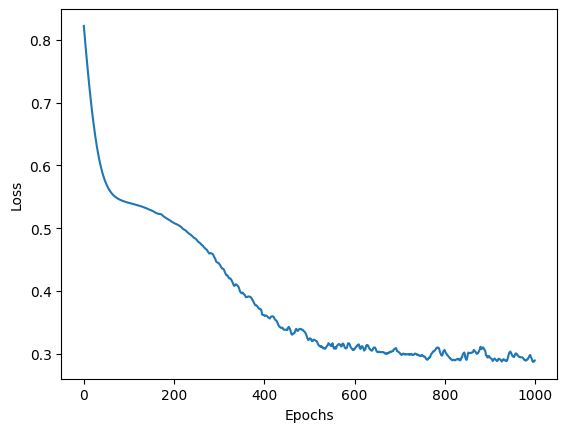

Training Losses are 
          0
0  0.696333
1  0.684090
2  0.672599
3  0.661735
4  0.651569
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2788  256]
 [ 291  665]]
Accuracy: 0.8632, Precision: 0.7220, Recall: 0.6956, F1-score: 0.7086

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2781  263]
 [ 290  666]]
Accuracy: 0.8618, Precision: 0.7169, Recall: 0.6967, F1-score: 0.7066



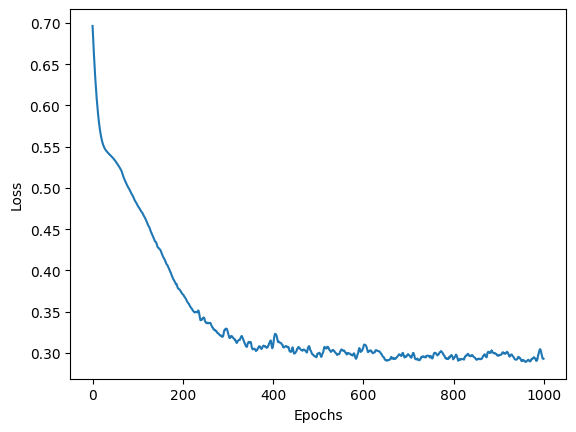

Training Losses are 
          0
0  0.956457
1  0.949565
2  0.942918
3  0.936329
4  0.929824
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2819  225]
 [ 293  663]]
Accuracy: 0.8705, Precision: 0.7466, Recall: 0.6935, F1-score: 0.7191

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2828  216]
 [ 306  650]]
Accuracy: 0.8695, Precision: 0.7506, Recall: 0.6799, F1-score: 0.7135



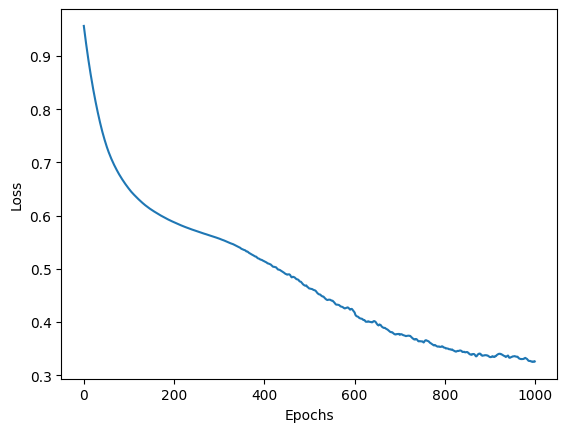

Training Losses are 
          0
0  0.715292
1  0.710369
2  0.705479
3  0.700686
4  0.695976
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2758  286]
 [ 245  711]]
Accuracy: 0.8672, Precision: 0.7131, Recall: 0.7437, F1-score: 0.7281

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2751  293]
 [ 236  720]]
Accuracy: 0.8678, Precision: 0.7108, Recall: 0.7531, F1-score: 0.7313



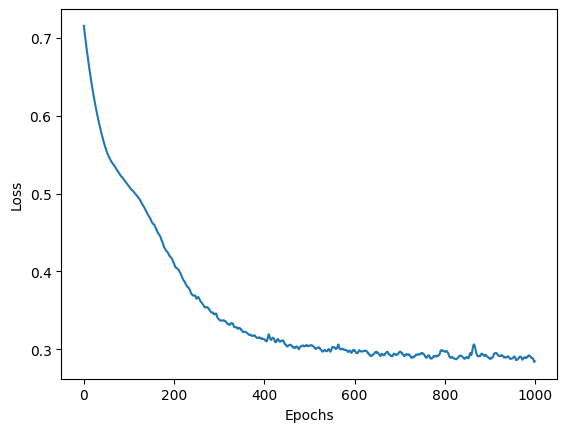

Training Losses are 
          0
0  0.641896
1  0.634722
2  0.627904
3  0.621290
4  0.614988
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2806  238]
 [ 280  676]]
Accuracy: 0.8705, Precision: 0.7396, Recall: 0.7071, F1-score: 0.7230

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2805  239]
 [ 299  657]]
Accuracy: 0.8655, Precision: 0.7333, Recall: 0.6872, F1-score: 0.7095



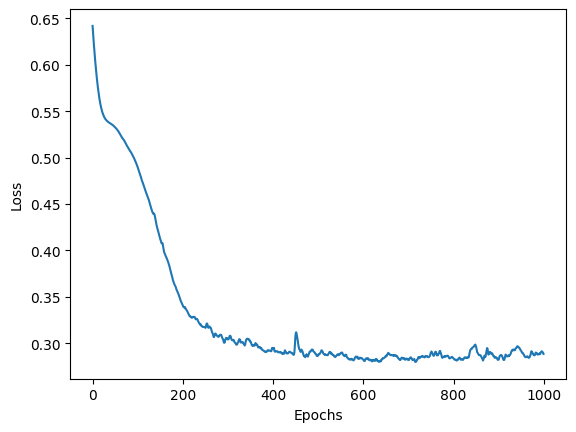

Training Losses are 
          0
0  0.828667
1  0.809951
2  0.792061
3  0.774769
4  0.758442
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2810  234]
 [ 297  659]]
Accuracy: 0.8672, Precision: 0.7380, Recall: 0.6893, F1-score: 0.7128

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2791  253]
 [ 298  658]]
Accuracy: 0.8622, Precision: 0.7223, Recall: 0.6883, F1-score: 0.7049



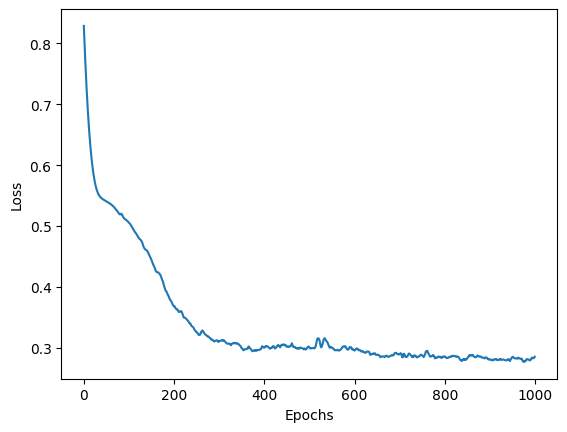

Training Losses are 
          0
0  0.778754
1  0.773499
2  0.768398
3  0.763348
4  0.758477
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2795  249]
 [ 262  694]]
Accuracy: 0.8722, Precision: 0.7359, Recall: 0.7259, F1-score: 0.7309

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2797  247]
 [ 265  691]]
Accuracy: 0.8720, Precision: 0.7367, Recall: 0.7228, F1-score: 0.7297



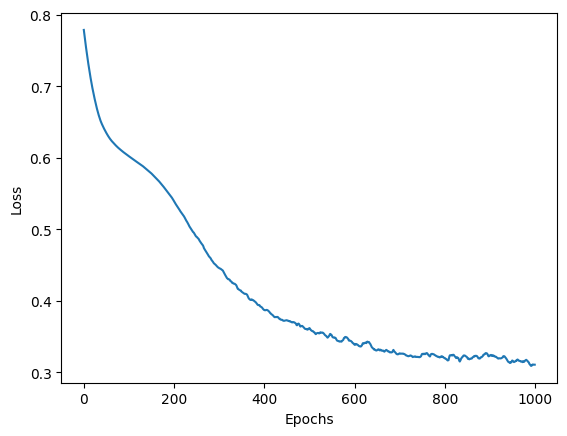

Training Losses are 
          0
0  0.655898
1  0.650092
2  0.644562
3  0.639277
4  0.634207
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2837  207]
 [ 324  632]]
Accuracy: 0.8672, Precision: 0.7533, Recall: 0.6611, F1-score: 0.7042

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2846  198]
 [ 325  631]]
Accuracy: 0.8692, Precision: 0.7612, Recall: 0.6600, F1-score: 0.7070



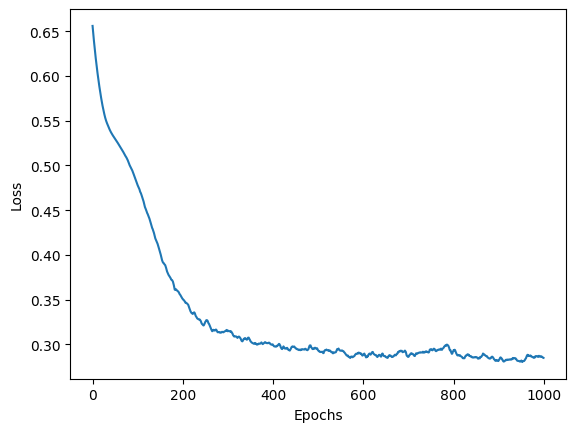

Training Losses are 
          0
0  0.648095
1  0.638786
2  0.629973
3  0.621580
4  0.613727
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2825  219]
 [ 300  656]]
Accuracy: 0.8702, Precision: 0.7497, Recall: 0.6862, F1-score: 0.7165

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2845  199]
 [ 317  639]]
Accuracy: 0.8710, Precision: 0.7625, Recall: 0.6684, F1-score: 0.7124



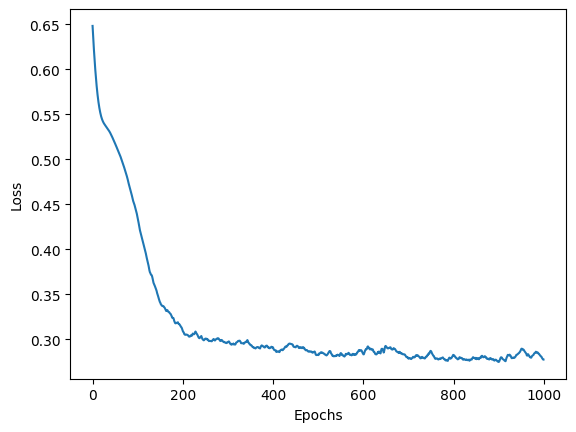

Training Losses are 
          0
0  0.648997
1  0.634149
2  0.620727
3  0.608560
4  0.597587
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2803  241]
 [ 291  665]]
Accuracy: 0.8670, Precision: 0.7340, Recall: 0.6956, F1-score: 0.7143

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2818  226]
 [ 275  681]]
Accuracy: 0.8748, Precision: 0.7508, Recall: 0.7123, F1-score: 0.7311



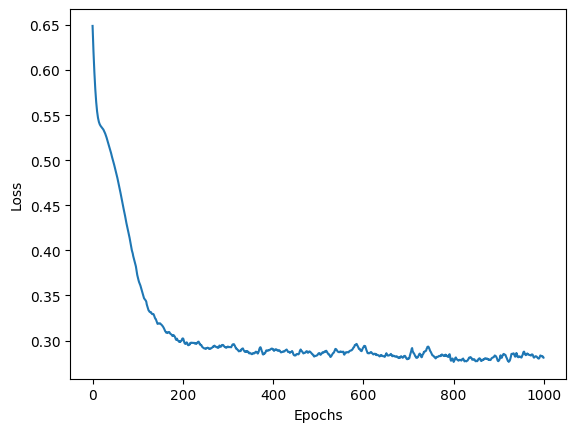

Best accuracy for test data is 0.87475 for degree 64


In [14]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(49,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [15]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.575916
1  0.575181
2  0.574452
3  0.573730
4  0.573016
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[2858  186]
 [ 353  603]]
Accuracy: 0.8652, Precision: 0.7643, Recall: 0.6308, F1-score: 0.6911

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[2867  177]
 [ 349  607]]
Accuracy: 0.8685, Precision: 0.7742, Recall: 0.6349, F1-score: 0.6977



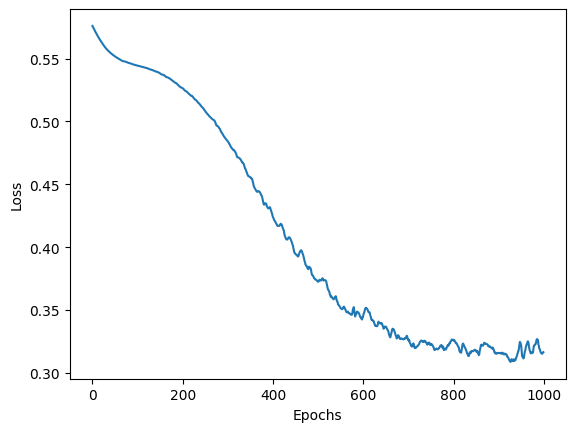

Training Losses are 
          0
0  0.678750
1  0.675672
2  0.672636
3  0.669640
4  0.666679
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[2770  274]
 [ 277  679]]
Accuracy: 0.8622, Precision: 0.7125, Recall: 0.7103, F1-score: 0.7114

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[2774  270]
 [ 268  688]]
Accuracy: 0.8655, Precision: 0.7182, Recall: 0.7197, F1-score: 0.7189



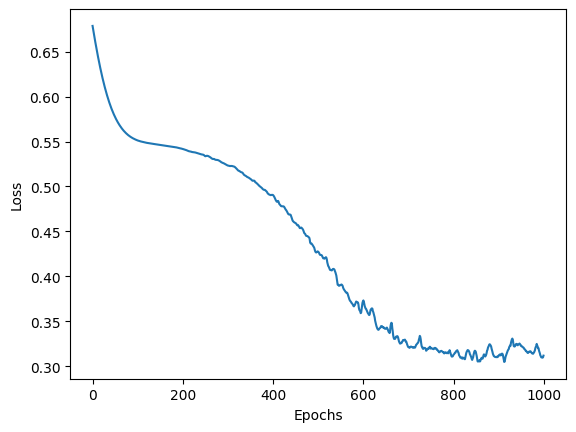

Training Losses are 
          0
0  0.701666
1  0.695970
2  0.690408
3  0.684969
4  0.679652
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[2714  330]
 [ 213  743]]
Accuracy: 0.8642, Precision: 0.6925, Recall: 0.7772, F1-score: 0.7324

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[2700  344]
 [ 228  728]]
Accuracy: 0.8570, Precision: 0.6791, Recall: 0.7615, F1-score: 0.7179



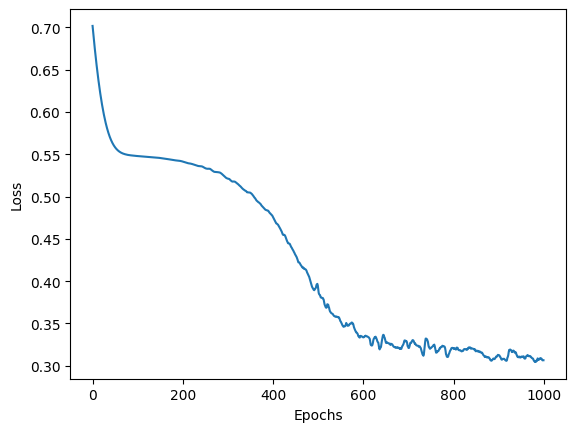

Training Losses are 
          0
0  0.613975
1  0.607666
2  0.601721
3  0.596132
4  0.590896
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2821  223]
 [ 298  658]]
Accuracy: 0.8698, Precision: 0.7469, Recall: 0.6883, F1-score: 0.7164

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2825  219]
 [ 307  649]]
Accuracy: 0.8685, Precision: 0.7477, Recall: 0.6789, F1-score: 0.7116



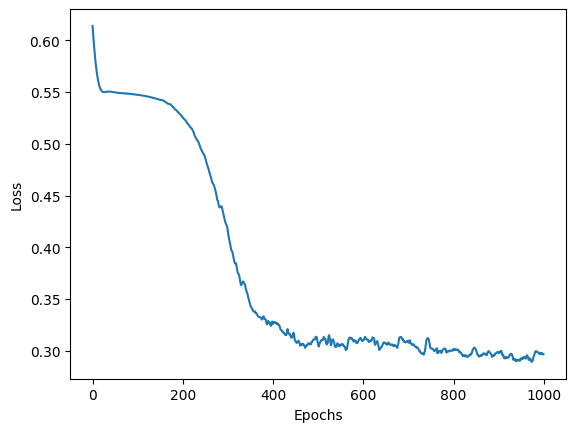

Training Losses are 
          0
0  0.770041
1  0.767588
2  0.765123
3  0.762677
4  0.760253
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2794  250]
 [ 287  669]]
Accuracy: 0.8658, Precision: 0.7280, Recall: 0.6998, F1-score: 0.7136

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2781  263]
 [ 278  678]]
Accuracy: 0.8648, Precision: 0.7205, Recall: 0.7092, F1-score: 0.7148



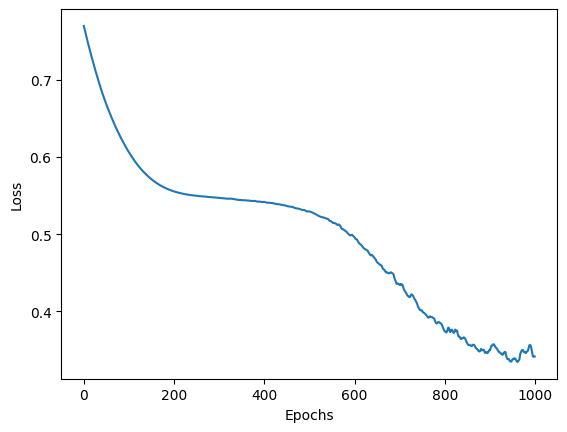

Training Losses are 
          0
0  0.698951
1  0.695214
2  0.691540
3  0.687920
4  0.684344
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2682  362]
 [ 207  749]]
Accuracy: 0.8578, Precision: 0.6742, Recall: 0.7835, F1-score: 0.7247

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2674  370]
 [ 218  738]]
Accuracy: 0.8530, Precision: 0.6661, Recall: 0.7720, F1-score: 0.7151



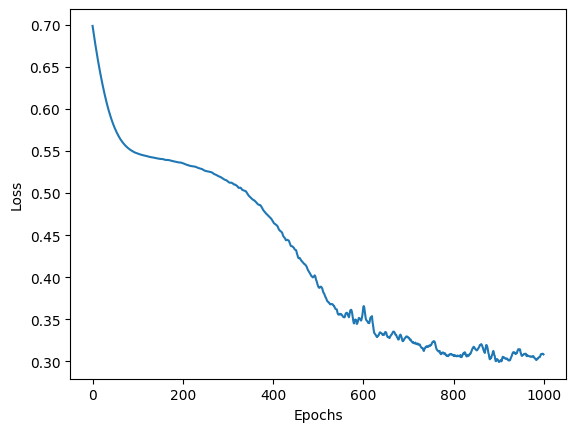

Training Losses are 
          0
0  0.680116
1  0.674129
2  0.668294
3  0.662621
4  0.657113
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2875  169]
 [ 369  587]]
Accuracy: 0.8655, Precision: 0.7765, Recall: 0.6140, F1-score: 0.6857

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2887  157]
 [ 377  579]]
Accuracy: 0.8665, Precision: 0.7867, Recall: 0.6056, F1-score: 0.6844



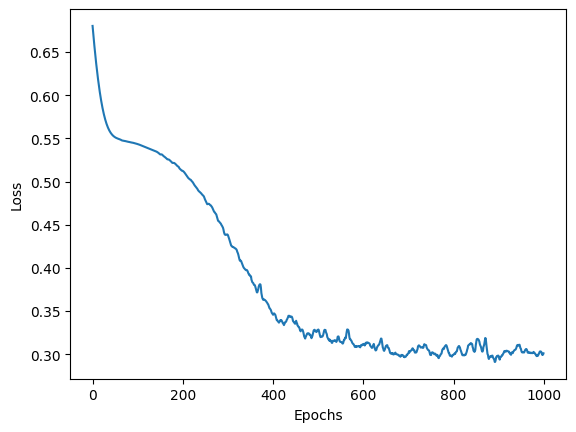

Training Losses are 
          0
0  0.694447
1  0.683923
2  0.673852
3  0.664234
4  0.655062
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2935  109]
 [ 467  489]]
Accuracy: 0.8560, Precision: 0.8177, Recall: 0.5115, F1-score: 0.6293

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2935  109]
 [ 489  467]]
Accuracy: 0.8505, Precision: 0.8108, Recall: 0.4885, F1-score: 0.6097



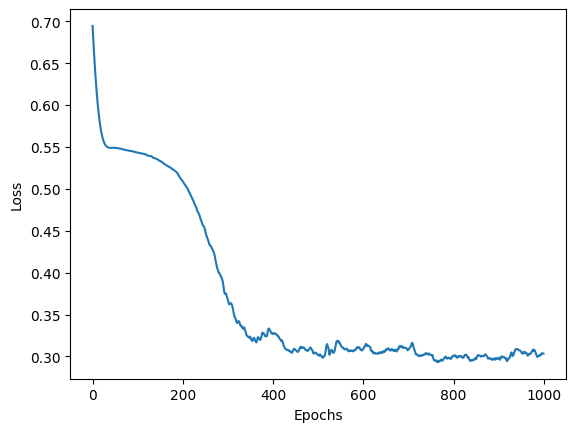

Training Losses are 
          0
0  0.756773
1  0.751835
2  0.747012
3  0.742245
4  0.737552
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2790  254]
 [ 264  692]]
Accuracy: 0.8705, Precision: 0.7315, Recall: 0.7238, F1-score: 0.7277

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2790  254]
 [ 260  696]]
Accuracy: 0.8715, Precision: 0.7326, Recall: 0.7280, F1-score: 0.7303



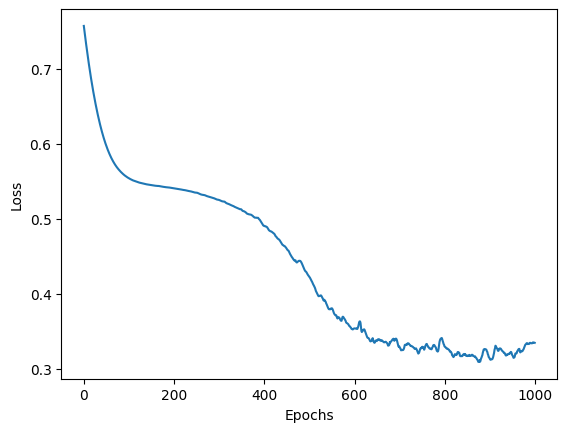

Training Losses are 
          0
0  0.591319
1  0.589209
2  0.587148
3  0.585132
4  0.583165
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2778  266]
 [ 285  671]]
Accuracy: 0.8622, Precision: 0.7161, Recall: 0.7019, F1-score: 0.7089

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2775  269]
 [ 287  669]]
Accuracy: 0.8610, Precision: 0.7132, Recall: 0.6998, F1-score: 0.7064



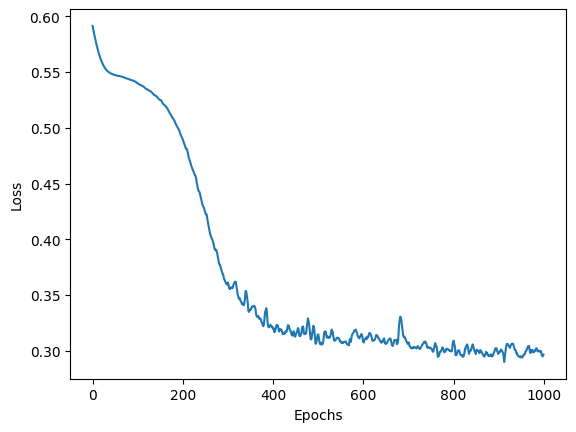

Training Losses are 
          0
0  0.604469
1  0.600025
2  0.595776
3  0.591717
4  0.587864
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2735  309]
 [ 216  740]]
Accuracy: 0.8688, Precision: 0.7054, Recall: 0.7741, F1-score: 0.7382

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2693  351]
 [ 216  740]]
Accuracy: 0.8582, Precision: 0.6783, Recall: 0.7741, F1-score: 0.7230



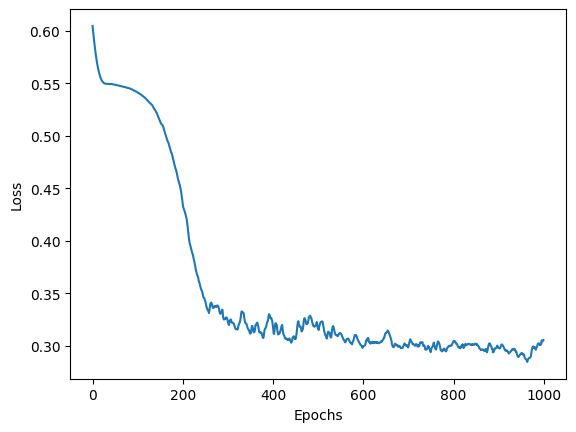

Training Losses are 
          0
0  0.822253
1  0.803495
2  0.785418
3  0.768047
4  0.751348
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2601  443]
 [ 161  795]]
Accuracy: 0.8490, Precision: 0.6422, Recall: 0.8316, F1-score: 0.7247

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2572  472]
 [ 147  809]]
Accuracy: 0.8452, Precision: 0.6315, Recall: 0.8462, F1-score: 0.7233



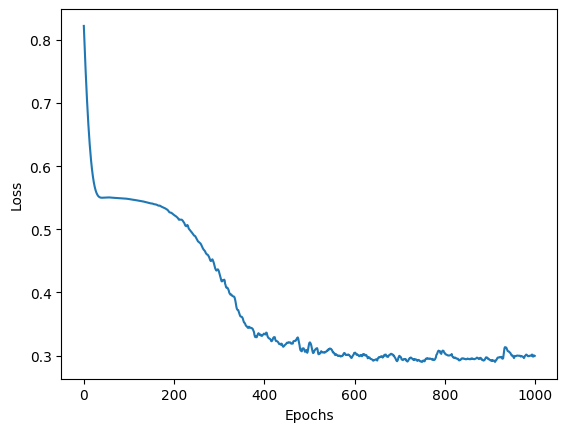

Training Losses are 
          0
0  0.689901
1  0.685648
2  0.681491
3  0.677424
4  0.673435
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2757  287]
 [ 241  715]]
Accuracy: 0.8680, Precision: 0.7136, Recall: 0.7479, F1-score: 0.7303

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2769  275]
 [ 237  719]]
Accuracy: 0.8720, Precision: 0.7233, Recall: 0.7521, F1-score: 0.7374



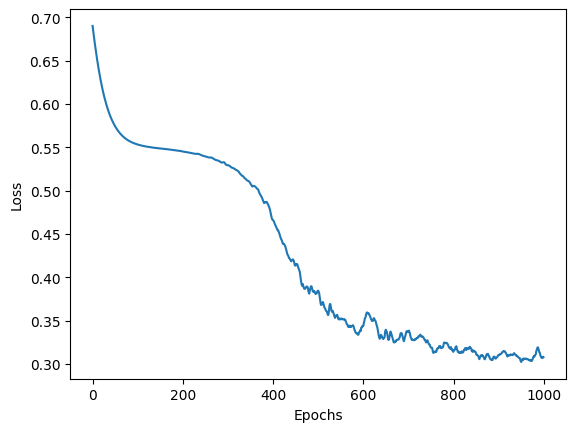

Training Losses are 
          0
0  0.861795
1  0.853254
2  0.844893
3  0.836712
4  0.828713
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2616  428]
 [ 147  809]]
Accuracy: 0.8562, Precision: 0.6540, Recall: 0.8462, F1-score: 0.7378

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2590  454]
 [ 147  809]]
Accuracy: 0.8498, Precision: 0.6405, Recall: 0.8462, F1-score: 0.7292



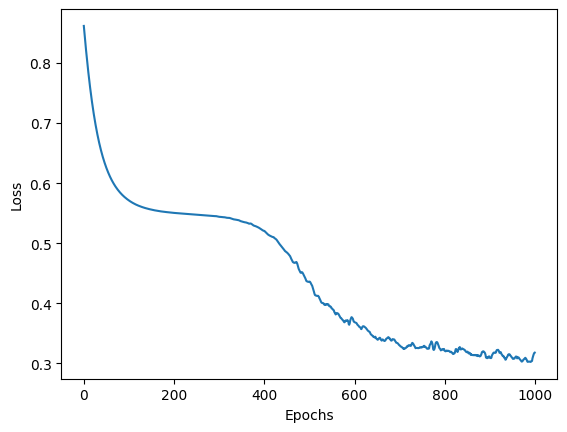

Training Losses are 
          0
0  0.736413
1  0.724535
2  0.713099
3  0.702105
4  0.691565
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2786  258]
 [ 289  667]]
Accuracy: 0.8632, Precision: 0.7211, Recall: 0.6977, F1-score: 0.7092

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2778  266]
 [ 282  674]]
Accuracy: 0.8630, Precision: 0.7170, Recall: 0.7050, F1-score: 0.7110



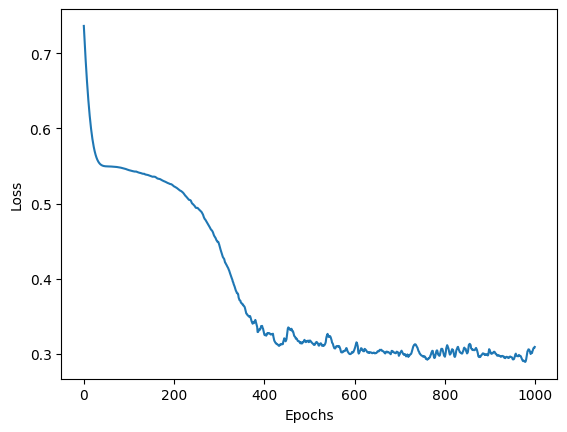

Training Losses are 
          0
0  0.756612
1  0.736485
2  0.717506
3  0.699649
4  0.682921
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2897  147]
 [ 408  548]]
Accuracy: 0.8612, Precision: 0.7885, Recall: 0.5732, F1-score: 0.6638

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2915  129]
 [ 410  546]]
Accuracy: 0.8652, Precision: 0.8089, Recall: 0.5711, F1-score: 0.6695



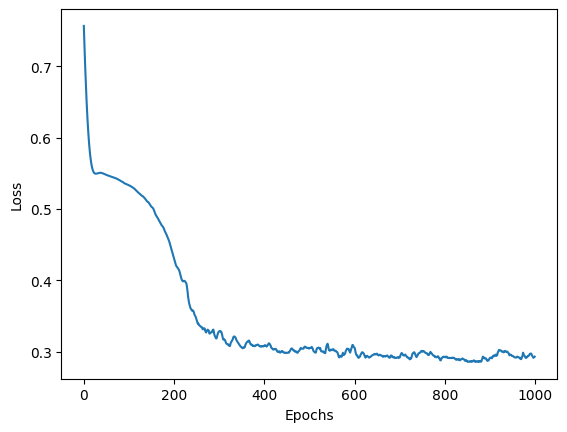

Training Losses are 
          0
0  0.620535
1  0.619258
2  0.617989
3  0.616735
4  0.615499
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2689  355]
 [ 207  749]]
Accuracy: 0.8595, Precision: 0.6784, Recall: 0.7835, F1-score: 0.7272

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2681  363]
 [ 205  751]]
Accuracy: 0.8580, Precision: 0.6741, Recall: 0.7856, F1-score: 0.7256



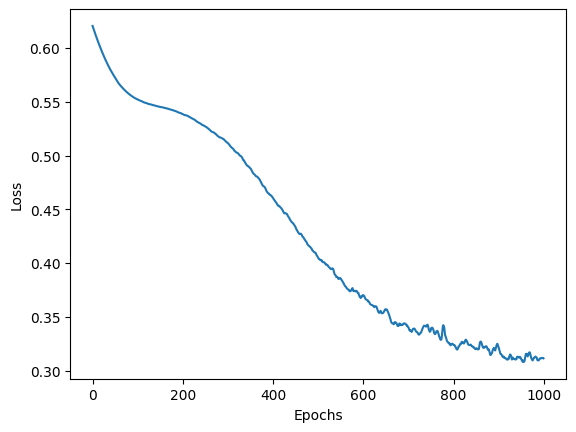

Training Losses are 
          0
0  0.616075
1  0.613986
2  0.611923
3  0.609894
4  0.607905
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2843  201]
 [ 351  605]]
Accuracy: 0.8620, Precision: 0.7506, Recall: 0.6328, F1-score: 0.6867

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2850  194]
 [ 336  620]]
Accuracy: 0.8675, Precision: 0.7617, Recall: 0.6485, F1-score: 0.7006



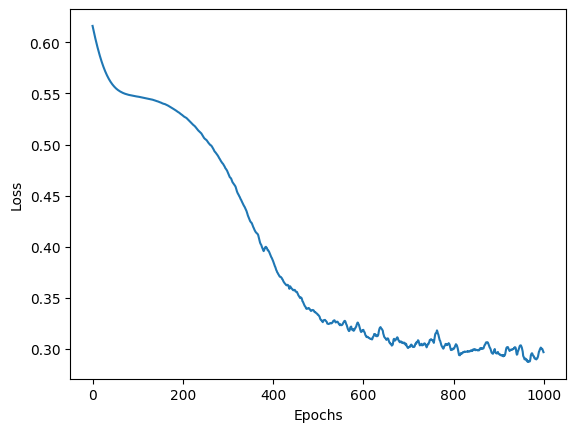

Training Losses are 
          0
0  0.691795
1  0.686638
2  0.681585
3  0.676636
4  0.671790
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2668  376]
 [ 173  783]]
Accuracy: 0.8628, Precision: 0.6756, Recall: 0.8190, F1-score: 0.7404

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2673  371]
 [ 165  791]]
Accuracy: 0.8660, Precision: 0.6807, Recall: 0.8274, F1-score: 0.7469



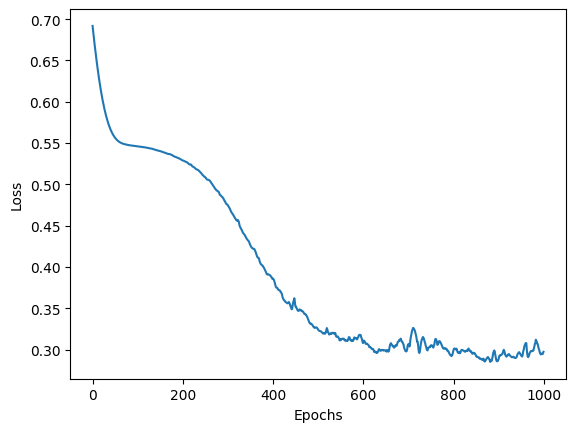

Training Losses are 
          0
0  0.802719
1  0.789373
2  0.776419
3  0.763852
4  0.751677
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2836  208]
 [ 324  632]]
Accuracy: 0.8670, Precision: 0.7524, Recall: 0.6611, F1-score: 0.7038

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2854  190]
 [ 320  636]]
Accuracy: 0.8725, Precision: 0.7700, Recall: 0.6653, F1-score: 0.7138



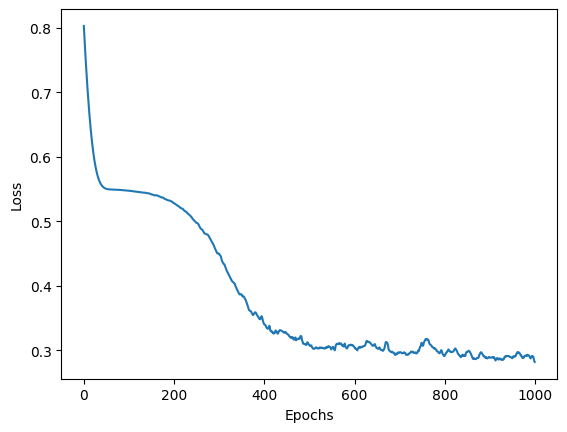

Training Losses are 
          0
0  0.752180
1  0.749768
2  0.747385
3  0.745011
4  0.742657
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2794  250]
 [ 307  649]]
Accuracy: 0.8608, Precision: 0.7219, Recall: 0.6789, F1-score: 0.6997

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2797  247]
 [ 298  658]]
Accuracy: 0.8638, Precision: 0.7271, Recall: 0.6883, F1-score: 0.7071



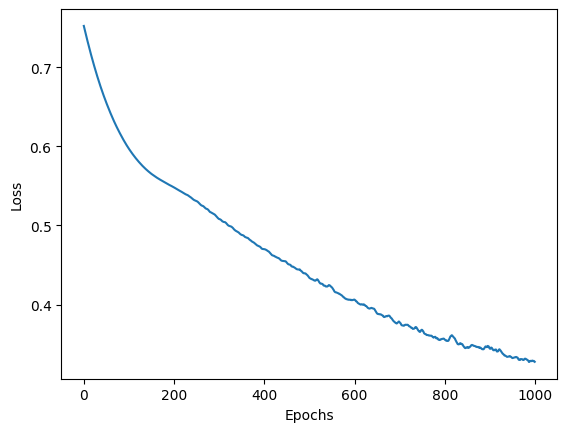

Training Losses are 
          0
0  0.713729
1  0.709452
2  0.705221
3  0.701057
4  0.696943
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2842  202]
 [ 313  643]]
Accuracy: 0.8712, Precision: 0.7609, Recall: 0.6726, F1-score: 0.7140

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2846  198]
 [ 310  646]]
Accuracy: 0.8730, Precision: 0.7654, Recall: 0.6757, F1-score: 0.7178



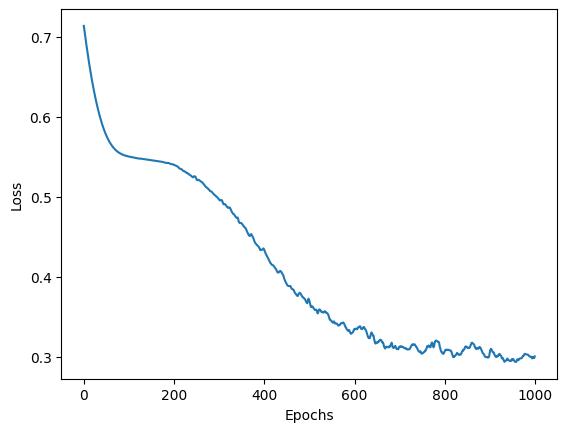

Training Losses are 
          0
0  0.703556
1  0.697202
2  0.690972
3  0.684876
4  0.678905
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2736  308]
 [ 256  700]]
Accuracy: 0.8590, Precision: 0.6944, Recall: 0.7322, F1-score: 0.7128

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2725  319]
 [ 245  711]]
Accuracy: 0.8590, Precision: 0.6903, Recall: 0.7437, F1-score: 0.7160



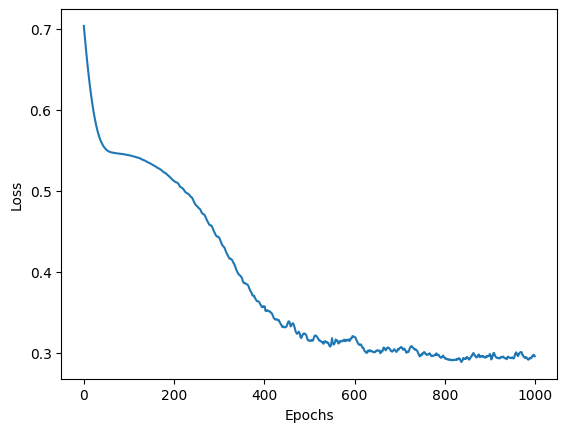

Training Losses are 
          0
0  0.719581
1  0.707529
2  0.695973
3  0.684912
4  0.674351
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2830  214]
 [ 312  644]]
Accuracy: 0.8685, Precision: 0.7506, Recall: 0.6736, F1-score: 0.7100

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2834  210]
 [ 297  659]]
Accuracy: 0.8732, Precision: 0.7583, Recall: 0.6893, F1-score: 0.7222



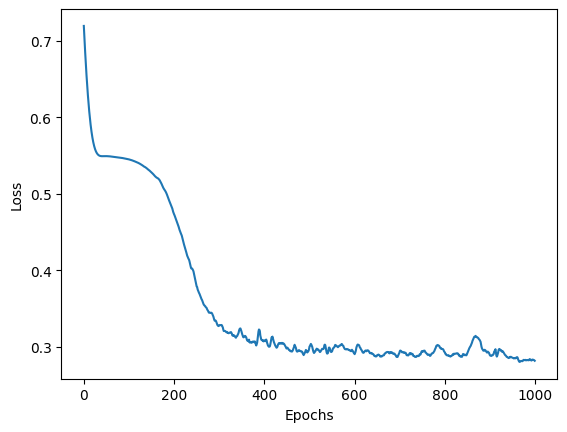

Training Losses are 
          0
0  0.752868
1  0.749400
2  0.745962
3  0.742566
4  0.739207
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2721  323]
 [ 240  716]]
Accuracy: 0.8592, Precision: 0.6891, Recall: 0.7490, F1-score: 0.7178

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2701  343]
 [ 216  740]]
Accuracy: 0.8602, Precision: 0.6833, Recall: 0.7741, F1-score: 0.7258



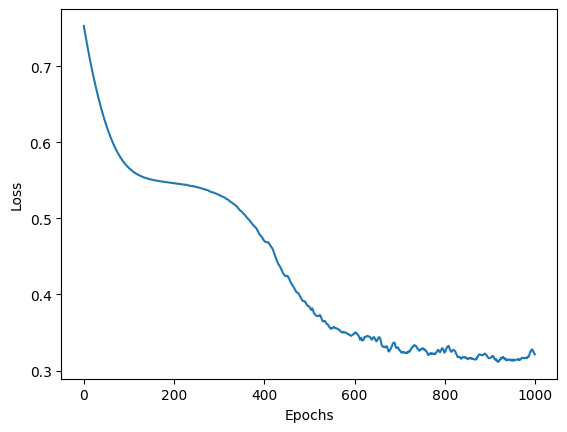

Training Losses are 
          0
0  0.865713
1  0.858762
2  0.851888
3  0.845115
4  0.838438
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2930  114]
 [ 469  487]]
Accuracy: 0.8542, Precision: 0.8103, Recall: 0.5094, F1-score: 0.6256

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2927  117]
 [ 453  503]]
Accuracy: 0.8575, Precision: 0.8113, Recall: 0.5262, F1-score: 0.6383



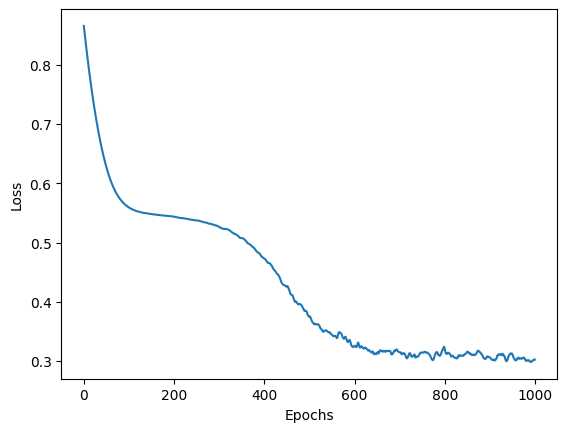

Training Losses are 
          0
0  0.702698
1  0.694199
2  0.685966
3  0.678000
4  0.670298
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2809  235]
 [ 273  683]]
Accuracy: 0.8730, Precision: 0.7440, Recall: 0.7144, F1-score: 0.7289

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2806  238]
 [ 282  674]]
Accuracy: 0.8700, Precision: 0.7390, Recall: 0.7050, F1-score: 0.7216



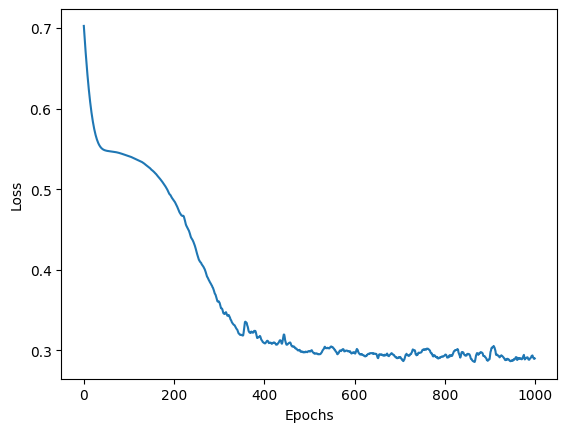

Training Losses are 
          0
0  0.627791
1  0.618089
2  0.609098
3  0.600827
4  0.593264
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2838  206]
 [ 354  602]]
Accuracy: 0.8600, Precision: 0.7450, Recall: 0.6297, F1-score: 0.6825

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2842  202]
 [ 340  616]]
Accuracy: 0.8645, Precision: 0.7531, Recall: 0.6444, F1-score: 0.6945



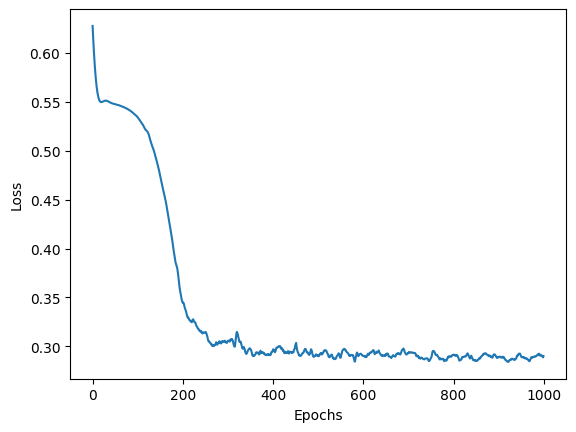

Training Losses are 
          0
0  0.747792
1  0.743321
2  0.738934
3  0.734628
4  0.730403
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2742  302]
 [ 251  705]]
Accuracy: 0.8618, Precision: 0.7001, Recall: 0.7374, F1-score: 0.7183

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2770  274]
 [ 238  718]]
Accuracy: 0.8720, Precision: 0.7238, Recall: 0.7510, F1-score: 0.7372



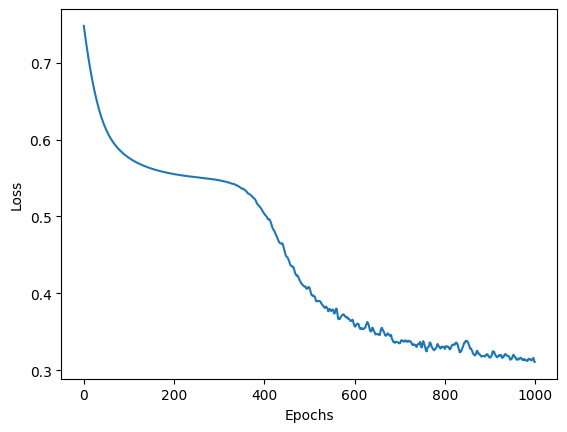

Training Losses are 
          0
0  0.638827
1  0.634091
2  0.629507
3  0.625060
4  0.620761
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2830  214]
 [ 319  637]]
Accuracy: 0.8668, Precision: 0.7485, Recall: 0.6663, F1-score: 0.7050

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2828  216]
 [ 317  639]]
Accuracy: 0.8668, Precision: 0.7474, Recall: 0.6684, F1-score: 0.7057



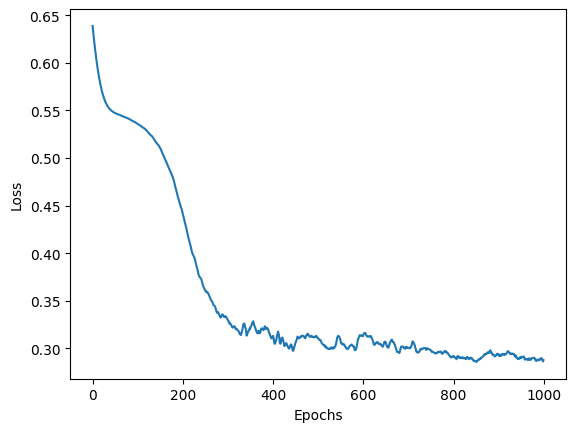

Training Losses are 
          0
0  0.650462
1  0.641366
2  0.632767
3  0.624652
4  0.617015
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2735  309]
 [ 239  717]]
Accuracy: 0.8630, Precision: 0.6988, Recall: 0.7500, F1-score: 0.7235

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2754  290]
 [ 251  705]]
Accuracy: 0.8648, Precision: 0.7085, Recall: 0.7374, F1-score: 0.7227



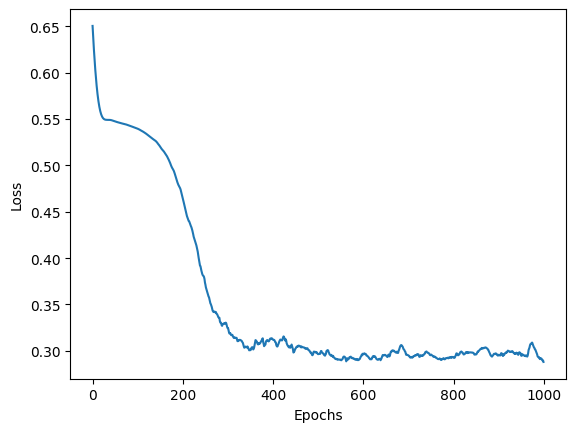

Training Losses are 
          0
0  0.673625
1  0.657652
2  0.642893
3  0.629384
4  0.617092
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2818  226]
 [ 311  645]]
Accuracy: 0.8658, Precision: 0.7405, Recall: 0.6747, F1-score: 0.7061

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2826  218]
 [ 311  645]]
Accuracy: 0.8678, Precision: 0.7474, Recall: 0.6747, F1-score: 0.7092



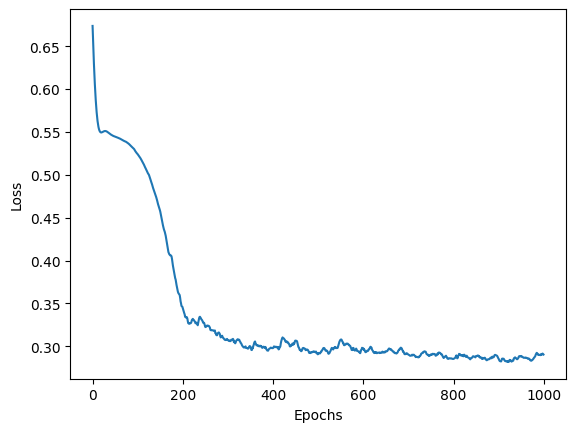

Training Losses are 
          0
0  0.600579
1  0.599431
2  0.598295
3  0.597187
4  0.596091
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2804  240]
 [ 347  609]]
Accuracy: 0.8532, Precision: 0.7173, Recall: 0.6370, F1-score: 0.6748

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2803  241]
 [ 325  631]]
Accuracy: 0.8585, Precision: 0.7236, Recall: 0.6600, F1-score: 0.6904



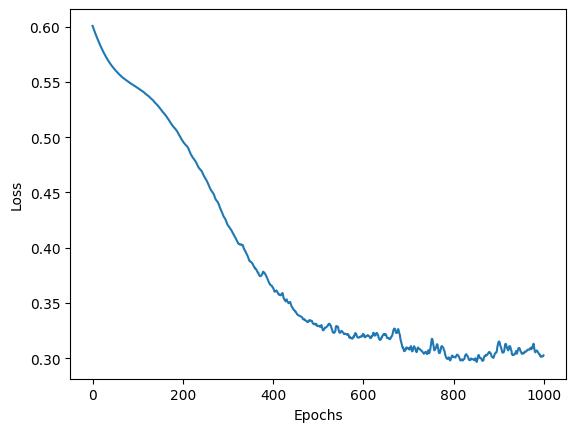

Training Losses are 
          0
0  0.696236
1  0.692800
2  0.689400
3  0.686037
4  0.682727
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2842  202]
 [ 315  641]]
Accuracy: 0.8708, Precision: 0.7604, Recall: 0.6705, F1-score: 0.7126

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2845  199]
 [ 311  645]]
Accuracy: 0.8725, Precision: 0.7642, Recall: 0.6747, F1-score: 0.7167



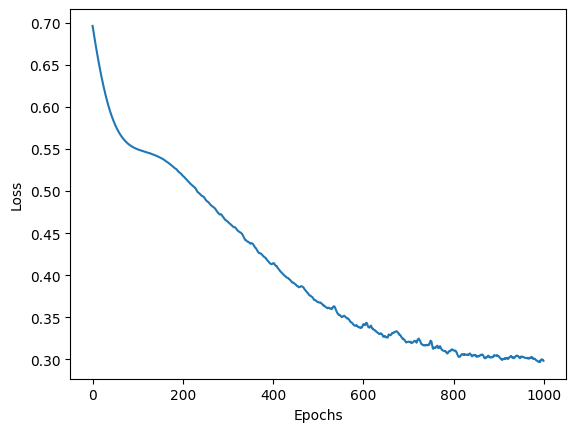

Training Losses are 
          0
0  0.571845
1  0.569719
2  0.567714
3  0.565810
4  0.564026
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2813  231]
 [ 304  652]]
Accuracy: 0.8662, Precision: 0.7384, Recall: 0.6820, F1-score: 0.7091

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2802  242]
 [ 288  668]]
Accuracy: 0.8675, Precision: 0.7341, Recall: 0.6987, F1-score: 0.7160



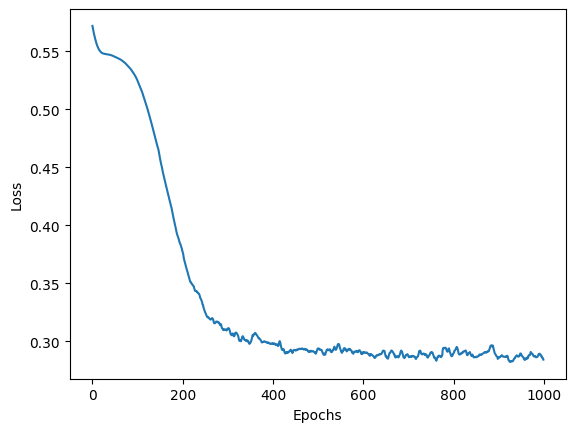

Training Losses are 
          0
0  0.697448
1  0.686950
2  0.676871
3  0.667230
4  0.658025
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2757  287]
 [ 263  693]]
Accuracy: 0.8625, Precision: 0.7071, Recall: 0.7249, F1-score: 0.7159

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2755  289]
 [ 243  713]]
Accuracy: 0.8670, Precision: 0.7116, Recall: 0.7458, F1-score: 0.7283



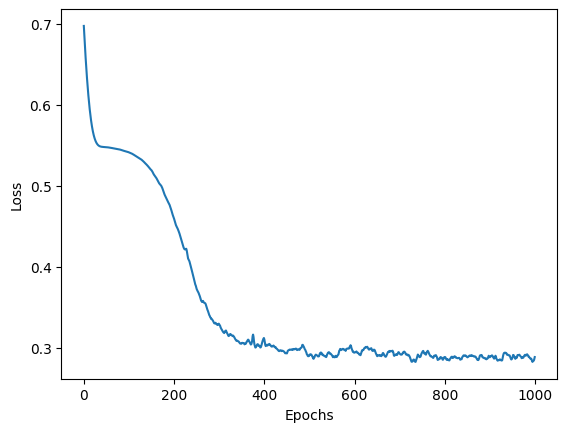

Training Losses are 
          0
0  0.595075
1  0.593626
2  0.592207
3  0.590813
4  0.589440
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2763  281]
 [ 266  690]]
Accuracy: 0.8632, Precision: 0.7106, Recall: 0.7218, F1-score: 0.7161

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2756  288]
 [ 263  693]]
Accuracy: 0.8622, Precision: 0.7064, Recall: 0.7249, F1-score: 0.7155



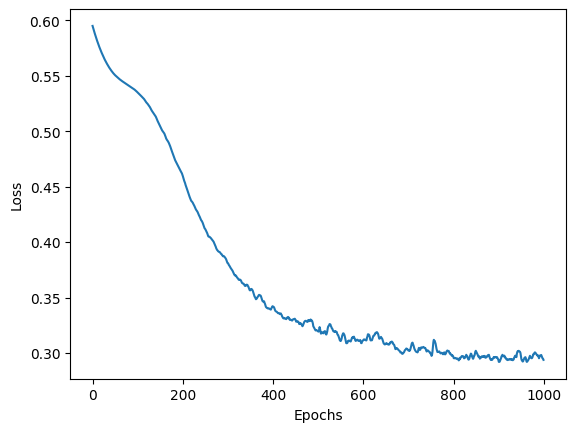

Training Losses are 
          0
0  0.723165
1  0.719389
2  0.715652
3  0.711957
4  0.708308
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2769  275]
 [ 251  705]]
Accuracy: 0.8685, Precision: 0.7194, Recall: 0.7374, F1-score: 0.7283

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2765  279]
 [ 254  702]]
Accuracy: 0.8668, Precision: 0.7156, Recall: 0.7343, F1-score: 0.7248



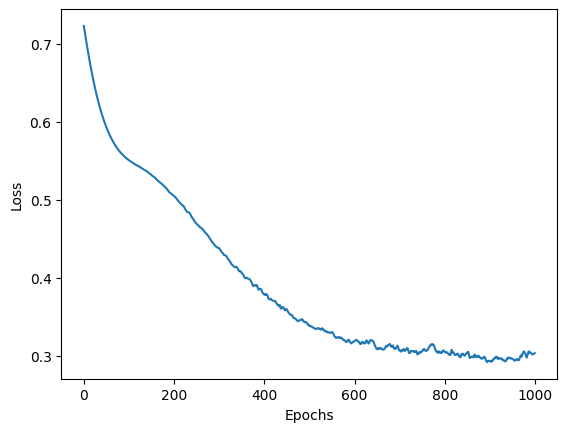

Training Losses are 
          0
0  0.645654
1  0.640343
2  0.635225
3  0.630266
4  0.625476
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2767  277]
 [ 266  690]]
Accuracy: 0.8642, Precision: 0.7135, Recall: 0.7218, F1-score: 0.7176

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2765  279]
 [ 241  715]]
Accuracy: 0.8700, Precision: 0.7193, Recall: 0.7479, F1-score: 0.7333



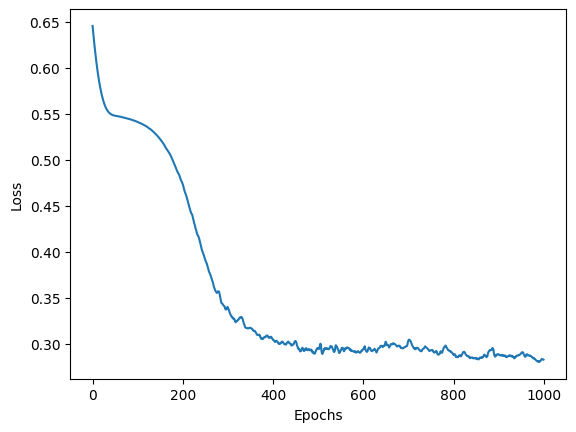

Training Losses are 
          0
0  0.657709
1  0.648207
2  0.639201
3  0.630674
4  0.622641
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2790  254]
 [ 310  646]]
Accuracy: 0.8590, Precision: 0.7178, Recall: 0.6757, F1-score: 0.6961

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2792  252]
 [ 303  653]]
Accuracy: 0.8612, Precision: 0.7215, Recall: 0.6831, F1-score: 0.7018



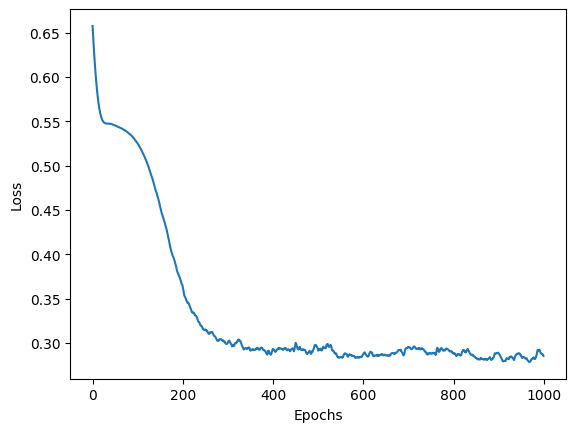

Training Losses are 
          0
0  0.793229
1  0.789181
2  0.785192
3  0.781277
4  0.777398
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2776  268]
 [ 266  690]]
Accuracy: 0.8665, Precision: 0.7203, Recall: 0.7218, F1-score: 0.7210

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2756  288]
 [ 269  687]]
Accuracy: 0.8608, Precision: 0.7046, Recall: 0.7186, F1-score: 0.7115



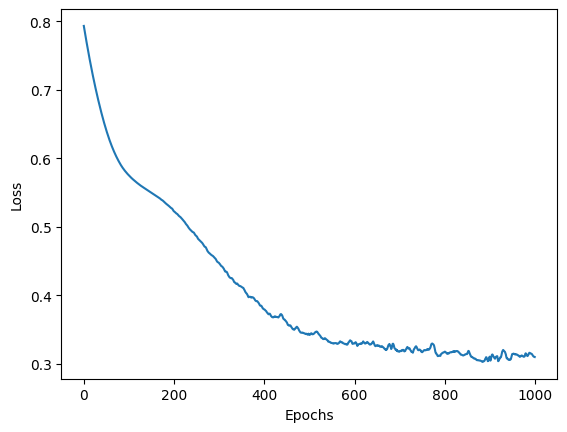

Training Losses are 
          0
0  0.595781
1  0.593043
2  0.590390
3  0.587816
4  0.585317
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2836  208]
 [ 337  619]]
Accuracy: 0.8638, Precision: 0.7485, Recall: 0.6475, F1-score: 0.6943

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2839  205]
 [ 330  626]]
Accuracy: 0.8662, Precision: 0.7533, Recall: 0.6548, F1-score: 0.7006



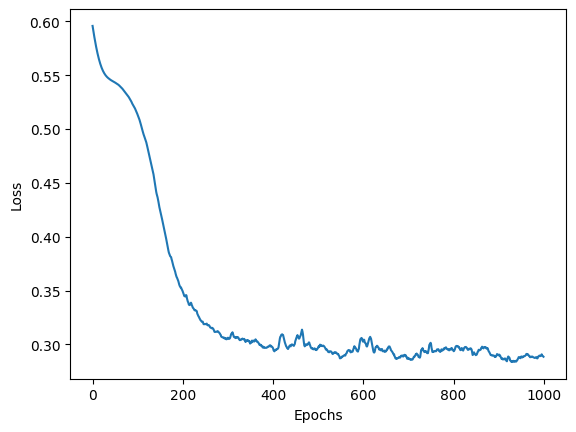

Training Losses are 
          0
0  0.669101
1  0.661994
2  0.655119
3  0.648473
4  0.642062
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2862  182]
 [ 335  621]]
Accuracy: 0.8708, Precision: 0.7733, Recall: 0.6496, F1-score: 0.7061

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2862  182]
 [ 324  632]]
Accuracy: 0.8735, Precision: 0.7764, Recall: 0.6611, F1-score: 0.7141



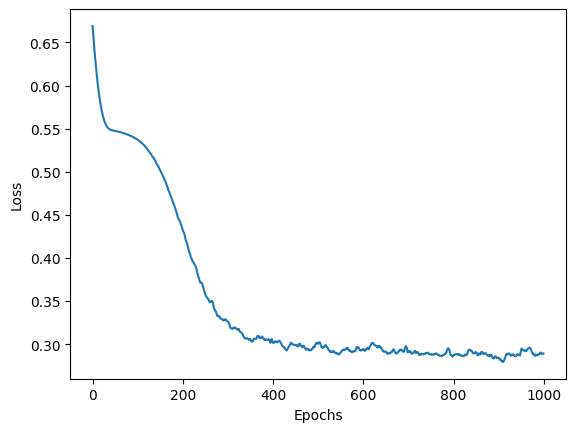

Training Losses are 
          0
0  0.636175
1  0.626517
2  0.617466
3  0.609032
4  0.601228
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2807  237]
 [ 297  659]]
Accuracy: 0.8665, Precision: 0.7355, Recall: 0.6893, F1-score: 0.7117

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2801  243]
 [ 311  645]]
Accuracy: 0.8615, Precision: 0.7264, Recall: 0.6747, F1-score: 0.6996



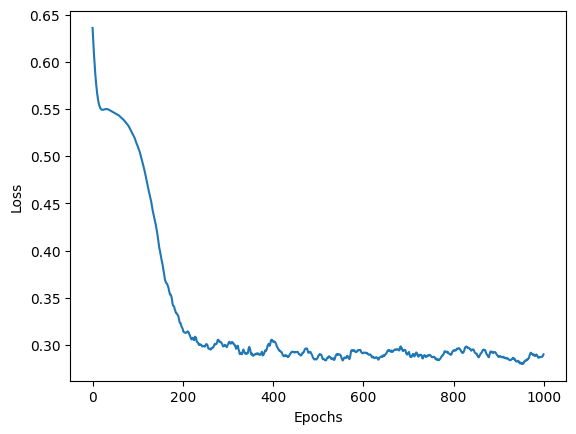

Training Losses are 
          0
0  0.671943
1  0.667267
2  0.662711
3  0.658282
4  0.653966
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2749  295]
 [ 251  705]]
Accuracy: 0.8635, Precision: 0.7050, Recall: 0.7374, F1-score: 0.7209

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[2755  289]
 [ 232  724]]
Accuracy: 0.8698, Precision: 0.7147, Recall: 0.7573, F1-score: 0.7354



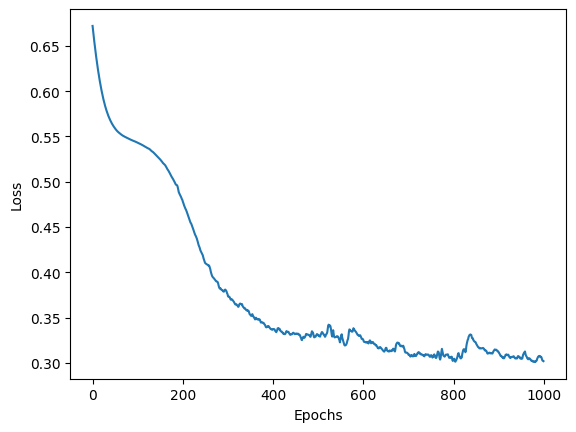

Training Losses are 
          0
0  0.838793
1  0.827745
2  0.816963
3  0.806460
4  0.796258
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2667  377]
 [ 202  754]]
Accuracy: 0.8552, Precision: 0.6667, Recall: 0.7887, F1-score: 0.7226

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2657  387]
 [ 209  747]]
Accuracy: 0.8510, Precision: 0.6587, Recall: 0.7814, F1-score: 0.7148



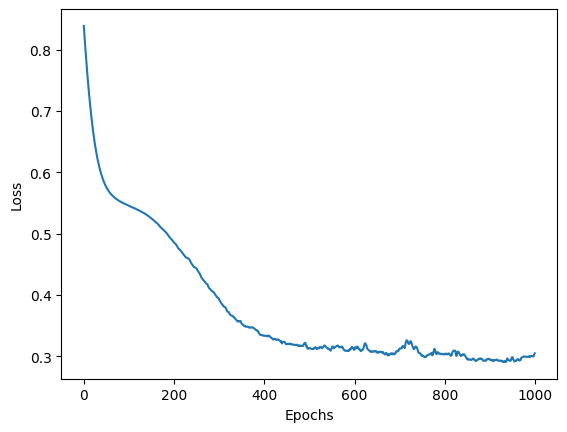

Training Losses are 
          0
0  0.930032
1  0.911500
2  0.893464
3  0.875932
4  0.858907
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2793  251]
 [ 292  664]]
Accuracy: 0.8642, Precision: 0.7257, Recall: 0.6946, F1-score: 0.7098

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2786  258]
 [ 272  684]]
Accuracy: 0.8675, Precision: 0.7261, Recall: 0.7155, F1-score: 0.7208



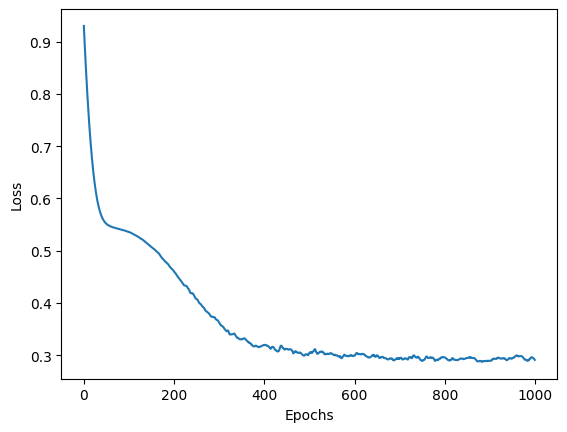

Training Losses are 
          0
0  0.687438
1  0.671019
2  0.655751
3  0.641634
4  0.628657
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2801  243]
 [ 289  667]]
Accuracy: 0.8670, Precision: 0.7330, Recall: 0.6977, F1-score: 0.7149

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[2784  260]
 [ 291  665]]
Accuracy: 0.8622, Precision: 0.7189, Recall: 0.6956, F1-score: 0.7071



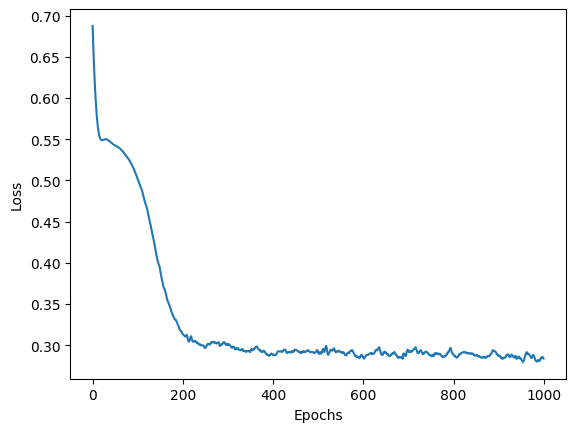

Training Losses are 
          0
0  0.634314
1  0.632507
2  0.630729
3  0.628974
4  0.627253
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2735  309]
 [ 246  710]]
Accuracy: 0.8612, Precision: 0.6968, Recall: 0.7427, F1-score: 0.7190

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[2757  287]
 [ 241  715]]
Accuracy: 0.8680, Precision: 0.7136, Recall: 0.7479, F1-score: 0.7303



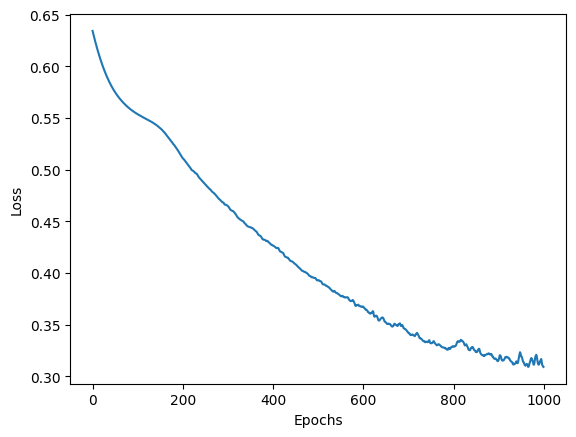

Training Losses are 
          0
0  0.693431
1  0.689963
2  0.686542
3  0.683159
4  0.679823
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2837  207]
 [ 351  605]]
Accuracy: 0.8605, Precision: 0.7451, Recall: 0.6328, F1-score: 0.6844

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2846  198]
 [ 345  611]]
Accuracy: 0.8642, Precision: 0.7553, Recall: 0.6391, F1-score: 0.6924



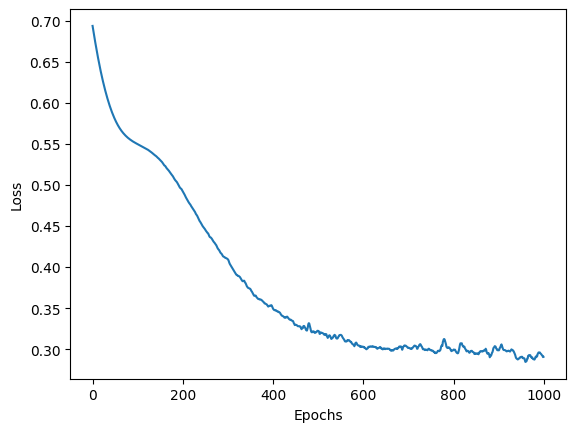

Training Losses are 
          0
0  0.631009
1  0.626661
2  0.622426
3  0.618307
4  0.614306
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2827  217]
 [ 334  622]]
Accuracy: 0.8622, Precision: 0.7414, Recall: 0.6506, F1-score: 0.6930

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2831  213]
 [ 303  653]]
Accuracy: 0.8710, Precision: 0.7540, Recall: 0.6831, F1-score: 0.7168



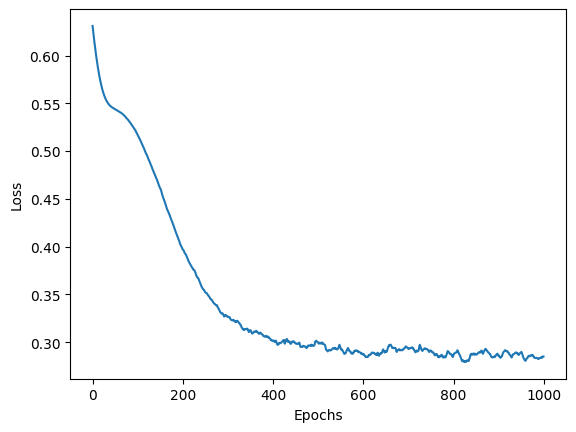

Training Losses are 
          0
0  0.724561
1  0.712790
2  0.701433
3  0.690521
4  0.680029
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2817  227]
 [ 288  668]]
Accuracy: 0.8712, Precision: 0.7464, Recall: 0.6987, F1-score: 0.7218

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2795  249]
 [ 310  646]]
Accuracy: 0.8602, Precision: 0.7218, Recall: 0.6757, F1-score: 0.6980



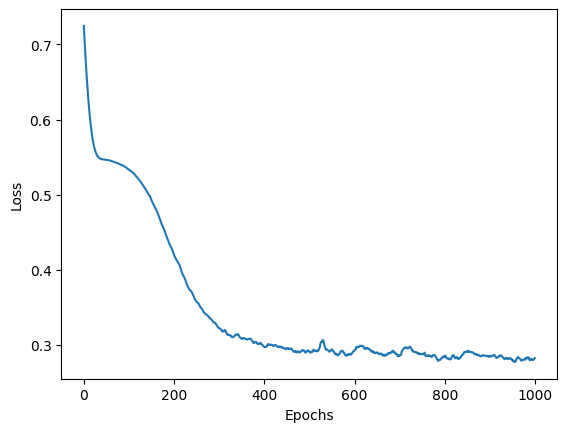

Training Losses are 
          0
0  0.755048
1  0.752332
2  0.749656
3  0.747010
4  0.744382
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2729  315]
 [ 222  734]]
Accuracy: 0.8658, Precision: 0.6997, Recall: 0.7678, F1-score: 0.7322

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2735  309]
 [ 215  741]]
Accuracy: 0.8690, Precision: 0.7057, Recall: 0.7751, F1-score: 0.7388



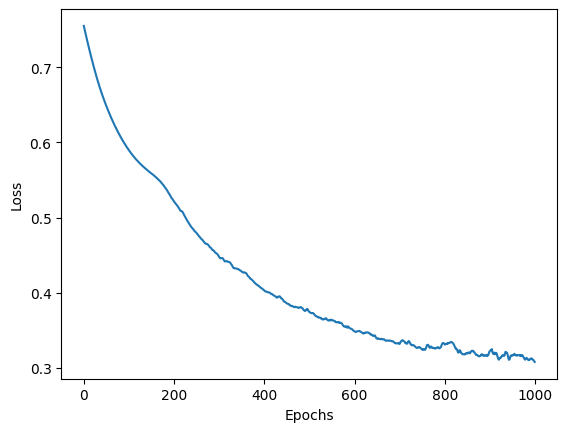

Training Losses are 
          0
0  0.691659
1  0.687846
2  0.684097
3  0.680416
4  0.676792
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2807  237]
 [ 289  667]]
Accuracy: 0.8685, Precision: 0.7378, Recall: 0.6977, F1-score: 0.7172

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2797  247]
 [ 306  650]]
Accuracy: 0.8618, Precision: 0.7246, Recall: 0.6799, F1-score: 0.7016



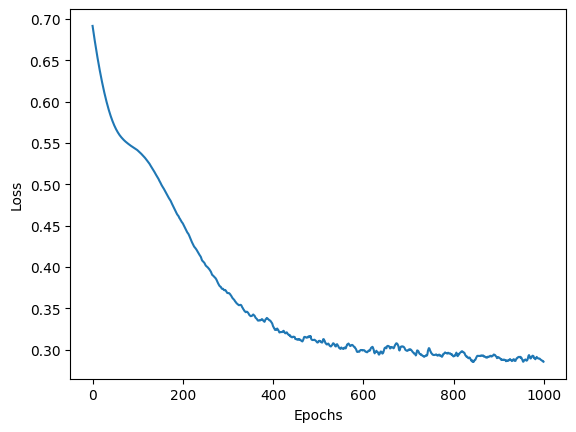

Training Losses are 
          0
0  0.650822
1  0.645305
2  0.639913
3  0.634674
4  0.629598
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2807  237]
 [ 289  667]]
Accuracy: 0.8685, Precision: 0.7378, Recall: 0.6977, F1-score: 0.7172

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2806  238]
 [ 289  667]]
Accuracy: 0.8682, Precision: 0.7370, Recall: 0.6977, F1-score: 0.7168



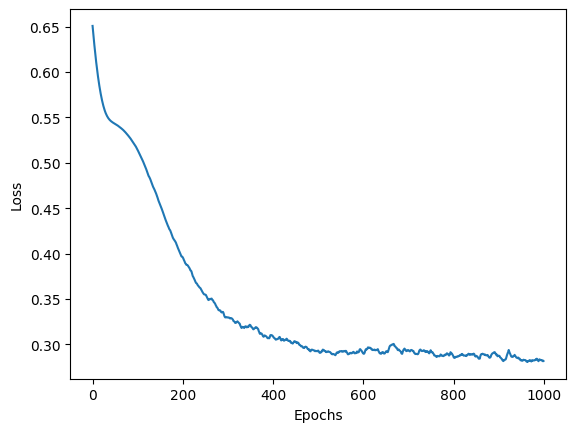

Training Losses are 
          0
0  0.643200
1  0.634246
2  0.625805
3  0.617880
4  0.610464
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2890  154]
 [ 387  569]]
Accuracy: 0.8648, Precision: 0.7870, Recall: 0.5952, F1-score: 0.6778

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2886  158]
 [ 393  563]]
Accuracy: 0.8622, Precision: 0.7809, Recall: 0.5889, F1-score: 0.6714



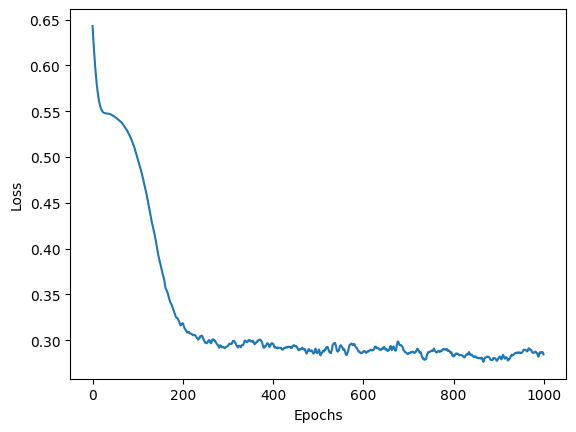

Training Losses are 
          0
0  0.586577
1  0.584756
2  0.582983
3  0.581259
4  0.579569
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2807  237]
 [ 292  664]]
Accuracy: 0.8678, Precision: 0.7370, Recall: 0.6946, F1-score: 0.7151

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[2823  221]
 [ 297  659]]
Accuracy: 0.8705, Precision: 0.7489, Recall: 0.6893, F1-score: 0.7179



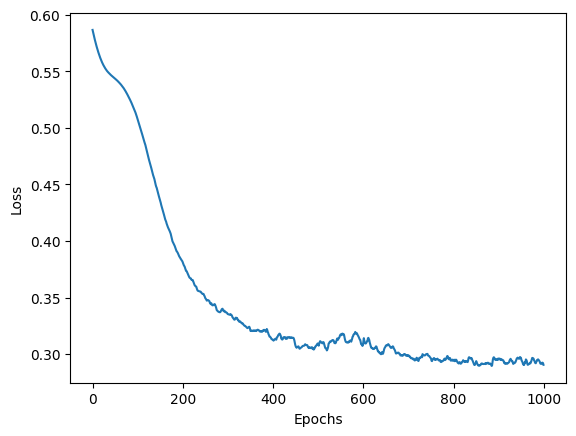

Training Losses are 
          0
0  0.707770
1  0.701093
2  0.694589
3  0.688242
4  0.682044
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2862  182]
 [ 342  614]]
Accuracy: 0.8690, Precision: 0.7714, Recall: 0.6423, F1-score: 0.7009

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2863  181]
 [ 342  614]]
Accuracy: 0.8692, Precision: 0.7723, Recall: 0.6423, F1-score: 0.7013



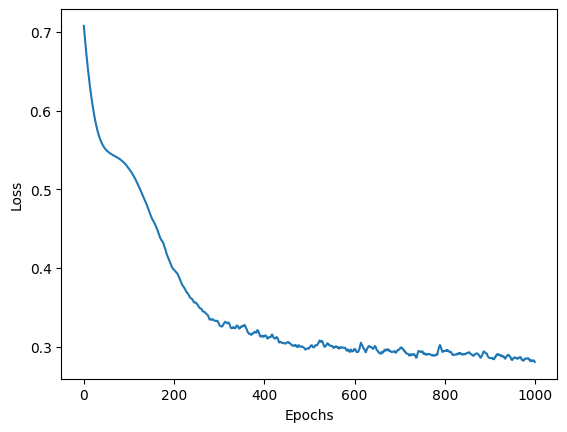

Training Losses are 
          0
0  0.704775
1  0.695477
2  0.686500
3  0.677826
4  0.669459
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[2811  233]
 [ 299  657]]
Accuracy: 0.8670, Precision: 0.7382, Recall: 0.6872, F1-score: 0.7118

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[2813  231]
 [ 293  663]]
Accuracy: 0.8690, Precision: 0.7416, Recall: 0.6935, F1-score: 0.7168



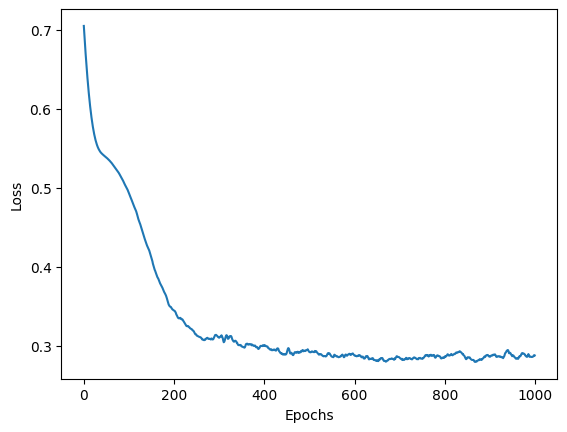

Training Losses are 
          0
0  0.586989
1  0.580413
2  0.574478
3  0.569199
4  0.564564
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2832  212]
 [ 311  645]]
Accuracy: 0.8692, Precision: 0.7526, Recall: 0.6747, F1-score: 0.7115

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2828  216]
 [ 306  650]]
Accuracy: 0.8695, Precision: 0.7506, Recall: 0.6799, F1-score: 0.7135



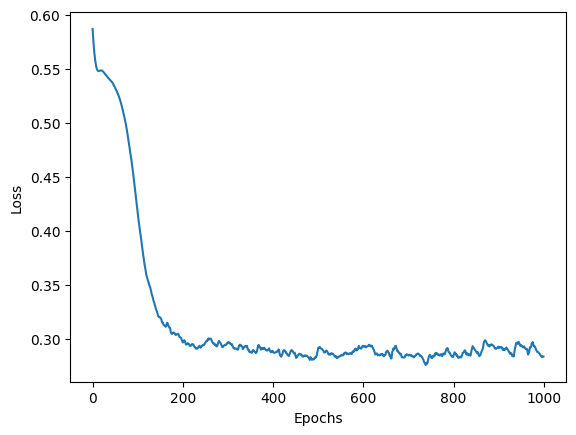

Training Losses are 
          0
0  0.626668
1  0.623186
2  0.619804
3  0.616512
4  0.613316
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2766  278]
 [ 280  676]]
Accuracy: 0.8605, Precision: 0.7086, Recall: 0.7071, F1-score: 0.7079

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2751  293]
 [ 273  683]]
Accuracy: 0.8585, Precision: 0.6998, Recall: 0.7144, F1-score: 0.7070



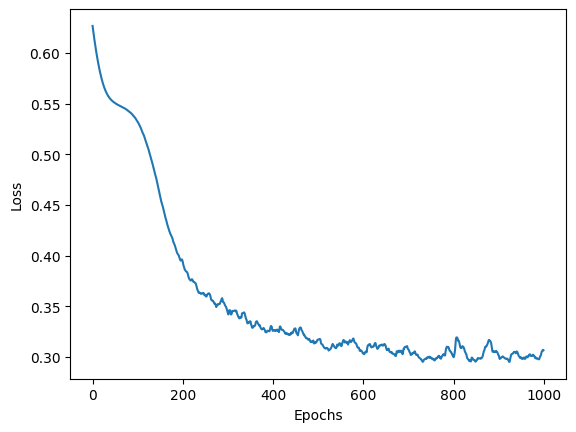

Training Losses are 
          0
0  0.819793
1  0.808136
2  0.796799
3  0.785774
4  0.775058
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2827  217]
 [ 314  642]]
Accuracy: 0.8672, Precision: 0.7474, Recall: 0.6715, F1-score: 0.7074

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2816  228]
 [ 311  645]]
Accuracy: 0.8652, Precision: 0.7388, Recall: 0.6747, F1-score: 0.7053



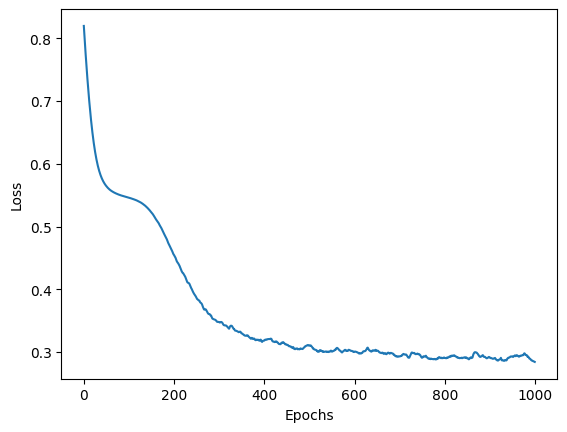

Training Losses are 
          0
0  0.622309
1  0.614896
2  0.607909
3  0.601351
4  0.595216
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2831  213]
 [ 319  637]]
Accuracy: 0.8670, Precision: 0.7494, Recall: 0.6663, F1-score: 0.7054

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2846  198]
 [ 313  643]]
Accuracy: 0.8722, Precision: 0.7646, Recall: 0.6726, F1-score: 0.7156



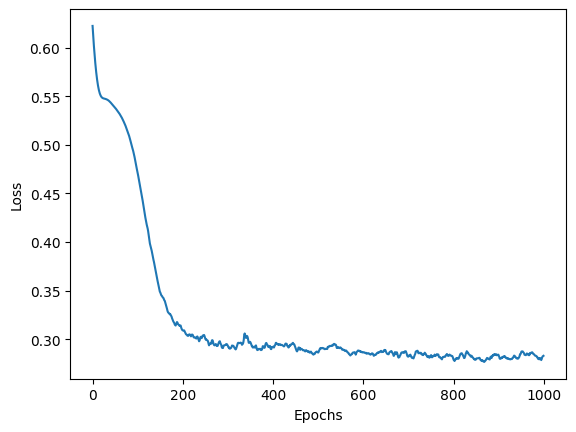

Training Losses are 
          0
0  0.631836
1  0.618968
2  0.607239
3  0.596665
4  0.587225
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2876  168]
 [ 381  575]]
Accuracy: 0.8628, Precision: 0.7739, Recall: 0.6015, F1-score: 0.6769

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2882  162]
 [ 368  588]]
Accuracy: 0.8675, Precision: 0.7840, Recall: 0.6151, F1-score: 0.6893



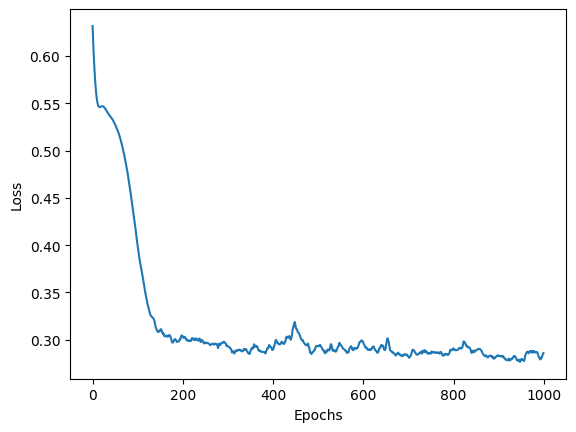

The best accuracy on test data is 0.8735 for layers 32 , 32, 32


In [16]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(49,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

In [11]:
print(X_training.shape)

(12000, 50)
